In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

SMALL_SIZE  = 8
MEDIUM_SIZE = 10

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
    
px2inch = 1/plt.rcParams['figure.dpi']

In [2]:
import ipywidgets as widgets
from   ipywidgets import  GridspecLayout,VBox,HBox,Layout
%matplotlib widget

plt.ioff();


def get_points(fi,N,r):
    
    xy    = np.arange(N)
    Xc,Yc = np.meshgrid(xy,xy)

    B  = np.linspace(0,2*np.pi,N)*np.ones((N,1))
    K  = np.ones((1,N))          *np.arange(N).reshape(-1,1)
    k  = 2*np.pi/(N-1)
    X  = Xc + r*np.cos( fi + B + K*k )
    Y  = Yc + r*np.sin( fi + B + K*k )
    
    return X,Y


# B = array([[0.000, 2.094 , 4.188 , 6.283],
#            [0.000, 2.094 , 4.188 , 6.283],
#            [0.000, 2.094 , 4.188 , 6.283],
#            [0.000, 2.094 , 4.188 , 6.283]])
 
# K = array([[0., 0., 0., 0.],
#            [1., 1., 1., 1.],
#            [2., 2., 2., 2.],
#            [3., 3., 3., 3.]])


### Demo points

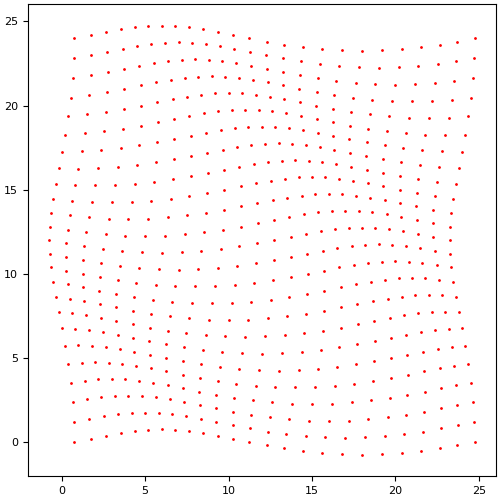

In [7]:

size_plot = 500
fig3, ax   = plt.subplots(1,1,constrained_layout=True,figsize=(size_plot*px2inch,size_plot*px2inch))
fig3.canvas.toolbar_position = 'right'
fig3.canvas.header_visible   = False

slider_F = widgets.FloatSlider( **{'description':'Phase'  ,  'min':0,   'max':2*np.pi,  'step':2*np.pi/360,'value':0   },continuous_update=True)
slider_N = widgets.IntSlider(   **{'description':'Npoints',  'min':5,   'max':150,      'step':20         ,'value':25  },continuous_update=True)
slider_R = widgets.FloatSlider( **{'description':'Distance', 'min':0.25,'max':5.0,      'step':0.25       ,'value':0.75},continuous_update=True)

def update_plots(change):
    
    fi = slider_F.value
    N  = slider_N.value
    r  = slider_R.value
    
    X,Y=get_points(fi,N,r)
    
    points[0].set_data(X.flatten(),Y.flatten())
    
    x_lims = np.array([np.min(X),np.max(X)])
    y_lims = np.array([np.min(Y),np.max(Y)])
    k_axis = 0.05
    ax.set_ylim(x_lims + k_axis*np.array([-1,1])*np.diff(x_lims) )
    ax.set_xlim(x_lims + k_axis*np.array([-1,1])*np.diff(y_lims) )
  
    fig3.canvas.draw()
    
fi = slider_F.value
N  = slider_N.value
r  = slider_R.value

X,Y     = get_points(fi,N,r)
points  = ax.plot(X.flatten(),Y.flatten(),'r.',ms=2,mfc='r')


slider_F.observe(update_plots)
slider_N.observe(update_plots)
slider_R.observe(update_plots)

hbox = HBox([slider_F,slider_N ,slider_R])
vbox = VBox([hbox,fig3.canvas])
display(hbox)

plt.show()

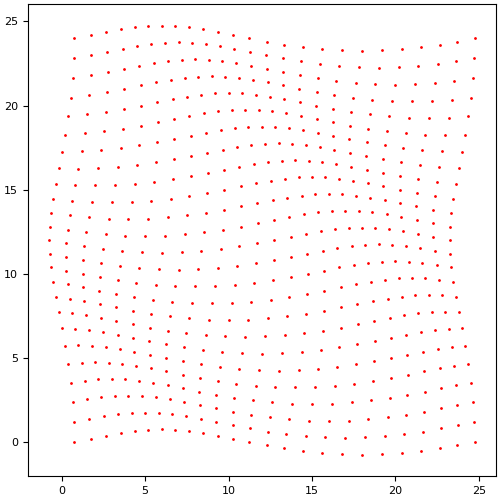

In [ ]:

size_plot = 500
fig3, ax   = plt.subplots(1,1,constrained_layout=True,figsize=(size_plot*px2inch,size_plot*px2inch))
fig3.canvas.toolbar_position = 'right'
fig3.canvas.header_visible   = False

slider_F = widgets.FloatSlider( **{'description':'Phase'  ,  'min':0,   'max':2*np.pi,  'step':2*np.pi/360,'value':0   },continuous_update=True)
slider_N = widgets.IntSlider(   **{'description':'Npoints',  'min':5,   'max':150,      'step':20         ,'value':25  },continuous_update=True)
slider_R = widgets.FloatSlider( **{'description':'Distance', 'min':0.25,'max':5.0,      'step':0.25       ,'value':0.75},continuous_update=True)

def update_plots(change):
    
    fi = slider_F.value
    N  = slider_N.value
    r  = slider_R.value
    
    X,Y=get_points(fi,N,r)
    
    points[0].set_data(X.flatten(),Y.flatten())
    
    x_lims = np.array([np.min(X),np.max(X)])
    y_lims = np.array([np.min(Y),np.max(Y)])
    k_axis = 0.05
    ax.set_ylim(x_lims + k_axis*np.array([-1,1])*np.diff(x_lims) )
    ax.set_xlim(x_lims + k_axis*np.array([-1,1])*np.diff(y_lims) )
  
    fig3.canvas.draw()
    
fi = slider_F.value
N  = slider_N.value
r  = slider_R.value

X,Y     = get_points(fi,N,r)
points  = ax.plot(X.flatten(),Y.flatten(),'r.',ms=2,mfc='r')


slider_F.observe(update_plots)
slider_N.observe(update_plots)
slider_R.observe(update_plots)

hbox = HBox([slider_F,slider_N ,slider_R])
vbox = VBox([hbox,fig3.canvas])
display(hbox)

plt.show()

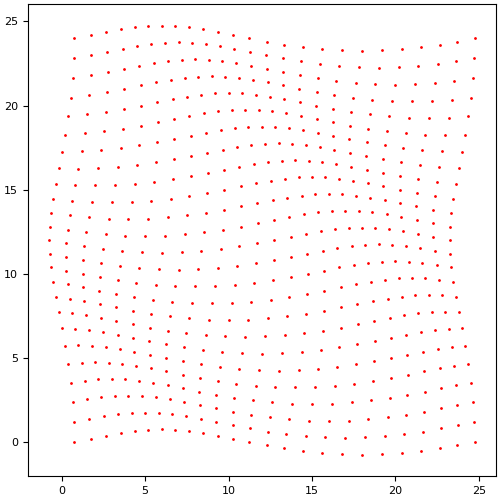

In [ ]:

size_plot = 500
fig3, ax   = plt.subplots(1,1,constrained_layout=True,figsize=(size_plot*px2inch,size_plot*px2inch))
fig3.canvas.toolbar_position = 'right'
fig3.canvas.header_visible   = False

slider_F = widgets.FloatSlider( **{'description':'Phase'  ,  'min':0,   'max':2*np.pi,  'step':2*np.pi/360,'value':0   },continuous_update=True)
slider_N = widgets.IntSlider(   **{'description':'Npoints',  'min':5,   'max':150,      'step':20         ,'value':25  },continuous_update=True)
slider_R = widgets.FloatSlider( **{'description':'Distance', 'min':0.25,'max':5.0,      'step':0.25       ,'value':0.75},continuous_update=True)

def update_plots(change):
    
    fi = slider_F.value
    N  = slider_N.value
    r  = slider_R.value
    
    X,Y=get_points(fi,N,r)
    
    points[0].set_data(X.flatten(),Y.flatten())
    
    x_lims = np.array([np.min(X),np.max(X)])
    y_lims = np.array([np.min(Y),np.max(Y)])
    k_axis = 0.05
    ax.set_ylim(x_lims + k_axis*np.array([-1,1])*np.diff(x_lims) )
    ax.set_xlim(x_lims + k_axis*np.array([-1,1])*np.diff(y_lims) )
  
    fig3.canvas.draw()
    
fi = slider_F.value
N  = slider_N.value
r  = slider_R.value

X,Y     = get_points(fi,N,r)
points  = ax.plot(X.flatten(),Y.flatten(),'r.',ms=2,mfc='r')


slider_F.observe(update_plots)
slider_N.observe(update_plots)
slider_R.observe(update_plots)

hbox = HBox([slider_F,slider_N ,slider_R])
vbox = VBox([hbox,fig3.canvas])
display(hbox)

plt.show()

### Demo lines

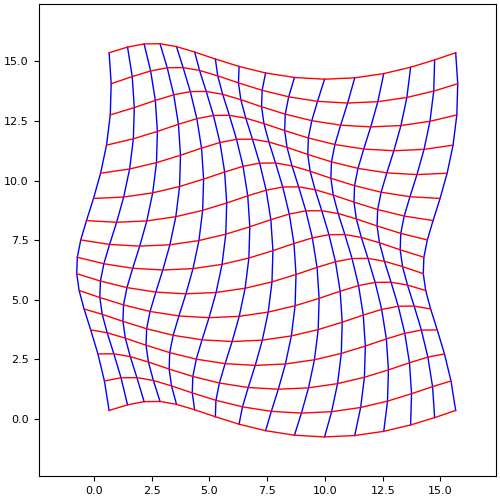

In [6]:

size_plot = 500
fig4, ax   = plt.subplots(1,1,constrained_layout=True,figsize=(size_plot*px2inch,size_plot*px2inch))
fig4.canvas.toolbar_position = 'right'
fig4.canvas.header_visible   = False

slider_F = widgets.FloatSlider( **{'description':'Phase'  ,  'min':0,    'max':2*np.pi,  'step':2*np.pi/360,'value':0.5 },continuous_update=True)
slider_R = widgets.FloatSlider( **{'description':'Distance', 'min':0.05, 'max':5.0,      'step':0.25       ,'value':0.75},continuous_update=True)

N = 16

def update_plots(change):
    
    fi    = slider_F.value
    r     = slider_R.value
    X,Y   = get_points(fi,N,r)
    
    for  i,(X_,Y_) in enumerate(zip(X,Y)):     lines_v[i].set_data(X_,Y_)
    for  i,(X_,Y_) in enumerate(zip(X.T,Y.T)): lines_h[i].set_data(X_,Y_)
  
    fig4.canvas.draw()
    plt.draw() 

fi      = slider_F.value
r       = slider_R.value
X,Y     = get_points(fi,N,r)
lines_v = ax.plot(X,Y    ,'b',lw=1)
lines_h = ax.plot(X.T,Y.T,'r',lw=1)

x_lims = np.array([np.min(X),np.max(X)])
y_lims = np.array([np.min(Y),np.max(Y)])
k_axis = 0.1
ax.set_ylim(x_lims + k_axis*np.array([-1,1])*np.diff(x_lims) )
ax.set_xlim(x_lims + k_axis*np.array([-1,1])*np.diff(y_lims) )


slider_F.observe(update_plots)
slider_R.observe(update_plots)

hbox = HBox([slider_F,slider_R])
vbox = VBox([hbox,fig4.canvas])
display(hbox)

plt.show()

In [5]:

xy=[1,3,4,5]

X,Y = np.meshgrid(xy,xy)

print(X)
print(Y)
print(X*Y)

[[1 3 4 5]
 [1 3 4 5]
 [1 3 4 5]
 [1 3 4 5]]
[[1 1 1 1]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]
[[ 1  3  4  5]
 [ 3  9 12 15]
 [ 4 12 16 20]
 [ 5 15 20 25]]
